# Modelos de Predición y Clasificación

In [ ]:
Nombre:

## Selección del data

The data were obtained in a survey of students math and portuguese language courses in secondary school. It contains a lot of interesting social, gender and study information about students

### Content:
Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course).


https://www.kaggle.com/datasets/uciml/student-alcohol-consumption?select=student-merge.

Nuestra variable de interes es la nota final de los estudiantes (G3).

In [910]:
# Tratamiento de datos

import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Configuración matplotlib
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

In [912]:
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path)
from l0bnb import fit_path

#Procesado y modelado

from scipy.stats import pearsonr

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

import statsmodels.formula.api as smf

from scipy import stats

import statsmodels as sms

from statsmodels.stats.stattools import durbin_watson #se agregarobn las ultimas 4

from statsmodels.stats.diagnostic import het_breuschpagan

from statsmodels.stats.outliers_influence import variance_inflation_factor

from statsmodels.stats.stattools import jarque_bera
 
 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score,confusion_matrix,ConfusionMatrixDisplay


In [914]:
d1=pd.read_csv("student-mat.csv")
d2=pd.read_csv("student-por.csv")
d1.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [173]:
d1.shape

(395, 33)

In [9]:
d2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
d2.shape

(649, 33)

In [13]:
d1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [15]:
d2.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [916]:
# Columnas clave para identificar estudiantes duplicados
columnas_clave = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu", 
                  "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime", "failures", 
                  "schoolsup", "famsup", "activities", "nursery", "higher", "internet", "romantic", 
                  "famrel", "freetime", "goout", "Dalc", "Walc", "health", "absences"]

# Realizar la fusión por estas columnas
d3 = pd.merge(d1, d2, on=columnas_clave, how="inner")

# Imprimir la cantidad de estudiantes duplicados
print(len(d3))

85


In [19]:
d3.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1_x,G2_x,G3_x,paid_y,G1_y,G2_y,G3_y
0,GP,M,16,U,LE3,T,2,2,other,other,...,1,3,0,12,12,11,no,13,12,13
1,GP,M,15,U,LE3,A,3,2,services,other,...,1,1,0,16,18,19,no,15,16,17
2,GP,M,15,U,GT3,T,3,4,other,other,...,1,5,0,14,15,15,no,12,12,13
3,GP,M,15,U,GT3,A,2,2,other,other,...,1,3,0,14,16,16,no,14,14,15
4,GP,M,15,U,GT3,T,4,3,teacher,other,...,1,1,0,13,14,15,no,12,13,14
5,GP,M,15,U,GT3,T,4,4,health,health,...,1,5,0,12,15,15,yes,11,12,12
6,GP,F,15,R,GT3,T,2,4,services,health,...,1,5,2,10,9,8,no,10,11,10
7,GP,M,15,U,GT3,T,4,4,health,services,...,4,5,0,9,11,12,yes,10,11,11
8,GP,M,15,R,GT3,T,4,3,teacher,at_home,...,1,5,0,17,16,16,no,13,14,15
9,GP,M,15,U,LE3,T,3,3,other,other,...,1,2,0,8,10,12,no,13,12,12


In [21]:
d3.shape

(85, 37)

In [23]:
d3.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid_x', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1_x', 'G2_x', 'G3_x', 'paid_y', 'G1_y',
       'G2_y', 'G3_y'],
      dtype='object')

In [918]:
# Agregar la columna 'curso'
d1["curso"] = "Matemáticas"
d2["curso"] = "Portugués"
d3["curso"] = "Ambos"  

# Definir las columnas clave sin incluir 'curso'
columnas_clave = ["school", "sex", "age", "address", "famsize", "Pstatus", "Medu", "Fedu",
                  "Mjob", "Fjob", "reason", "guardian", "traveltime", "studytime",
                  "failures", "schoolsup", "famsup", "activities", "nursery",
                  "higher", "internet", "romantic", "famrel", "freetime", "goout", "Dalc",
                  "Walc", "health", "absences"]

# Eliminar los duplicados
d2_sin_duplicados = d2[~d2[columnas_clave].apply(tuple, axis=1).isin(d3[columnas_clave].apply(tuple, axis=1))]


In [920]:
d2_sin_duplicados.shape

(564, 34)

In [922]:
df_final = pd.concat([d1, d2_sin_duplicados, d3], ignore_index=False)


In [924]:
print(df_final["curso"].value_counts())
print(df_final.isna().sum()) 



curso
Portugués      564
Matemáticas    395
Ambos           85
Name: count, dtype: int64
school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian        0
traveltime      0
studytime       0
failures        0
schoolsup       0
famsup          0
paid           85
activities      0
nursery         0
higher          0
internet        0
romantic        0
famrel          0
freetime        0
goout           0
Dalc            0
Walc            0
health          0
absences        0
G1             85
G2             85
G3             85
curso           0
paid_x        959
G1_x          959
G2_x          959
G3_x          959
paid_y        959
G1_y          959
G2_y          959
G3_y          959
dtype: int64


In [926]:
# Crear una copia con datos de Matemáticas
d3_mate = d3.copy()
d3_mate["G1"] = d3_mate["G1_x"]
d3_mate["G2"] = d3_mate["G2_x"]
d3_mate["G3"] = d3_mate["G3_x"]
d3_mate["paid"] = d3_mate["paid_x"]
d3_mate["curso"] = "Matemáticas"

# Crear una copia con datos de Portugués
d3_por = d3.copy()
d3_por["G1"] = d3_por["G1_y"]
d3_por["G2"] = d3_por["G2_y"]
d3_por["G3"] = d3_por["G3_y"]
d3_por["paid"] = d3_por["paid_y"]
d3_por["curso"] = "Portugués"

# Eliminar columnas duplicadas
d3_mate = d3_mate.drop(columns=["G1_x", "G2_x", "G3_x", "paid_x", "G1_y", "G2_y", "G3_y", "paid_y"])
d3_por = d3_por.drop(columns=["G1_x", "G2_x", "G3_x", "paid_x", "G1_y", "G2_y", "G3_y", "paid_y"])

# Unir todo en un solo DataFrame
df_final = pd.concat([d1, d2_sin_duplicados, d3_mate, d3_por], ignore_index=True)

print(df_final["curso"].value_counts())


curso
Portugués      649
Matemáticas    480
Name: count, dtype: int64


In [896]:
df_final.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,curso
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,Matemáticas
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,Matemáticas
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,Matemáticas
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,Matemáticas
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,Matemáticas


In [191]:
df_final.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'curso'],
      dtype='object')

In [193]:
df_final.shape

(1129, 34)

In [928]:
df_final.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
curso         0
dtype: int64

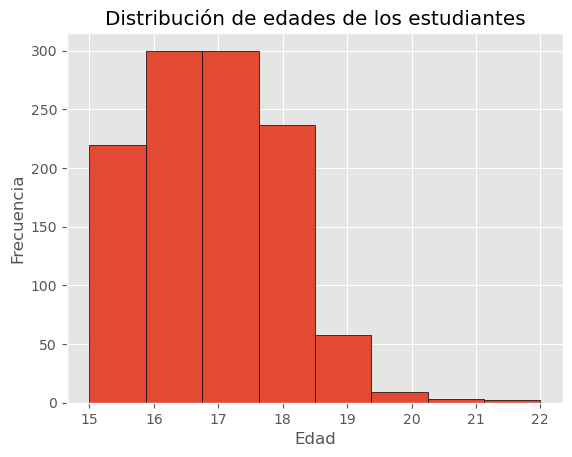

In [43]:
#Histograma de la edad de los estudiantes 
plt.hist(df_final["age"], bins=8, edgecolor="black")

plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.title("Distribución de edades de los estudiantes")

plt.show()



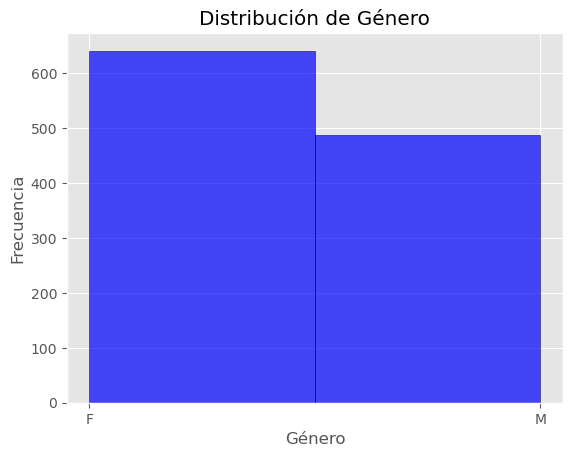

In [45]:
#Histograma del género M y F
plt.hist(df_final["sex"], bins=2, edgecolor="black", alpha=0.70, color="blue")

plt.xlabel("Género")
plt.ylabel("Frecuencia")
plt.title("Distribución de Género")

plt.show()

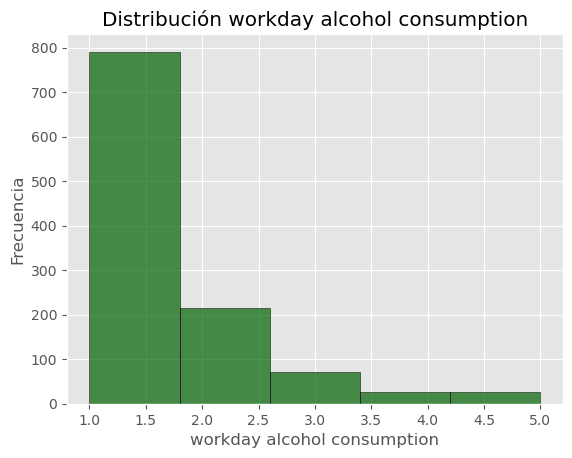

In [47]:
# Histograma del consumo de alcohol
plt.hist(df_final["Dalc"], bins=5, edgecolor="black" ,alpha=0.70, color="darkgreen")

plt.xlabel("workday alcohol consumption")
plt.ylabel("Frecuencia")
plt.title("Distribución workday alcohol consumption")

plt.show()


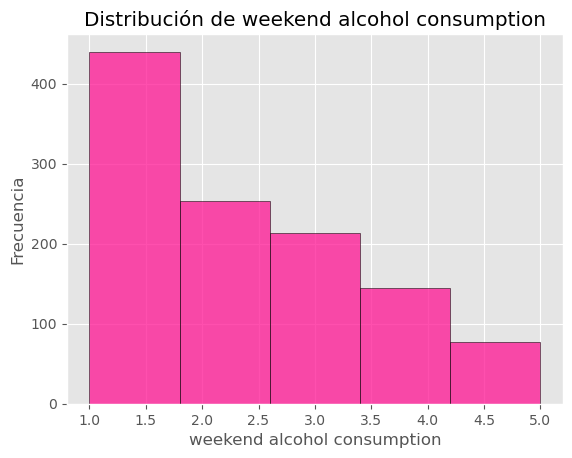

In [49]:
plt.hist(df_final["Walc"], bins=5, edgecolor="black", alpha=0.75,  color="deeppink")

plt.xlabel("weekend alcohol consumption")
plt.ylabel("Frecuencia")
plt.title("Distribución de weekend alcohol consumption")

plt.show()


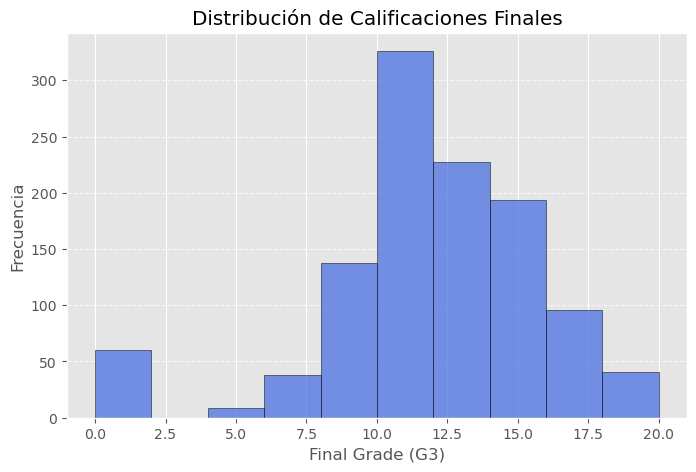

In [319]:
#Histograma de las calificaciones finales (G3)
plt.figure(figsize=(8, 5))
plt.hist(df_final["G3"], bins=10, edgecolor="black", alpha=0.70, color="royalblue")

plt.xlabel("Final Grade (G3)")
plt.ylabel("Frecuencia")
plt.title("Distribución de Calificaciones Finales")

plt.grid(axis="y", linestyle="--", alpha=0.7) 
plt.show()

In [329]:
df_final['G3'].mean()

11.391496899911425

In [930]:
df = pd.get_dummies(df_final, columns=['Mjob', 'Fjob', 'reason', 'guardian','curso'], drop_first=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,curso_Portugués
0,GP,F,18,U,GT3,A,4,4,2,2,...,False,False,False,True,False,False,False,True,False,False
1,GP,F,17,U,GT3,T,1,1,1,2,...,False,True,False,False,False,False,False,False,False,False
2,GP,F,15,U,LE3,T,1,1,1,2,...,False,True,False,False,False,True,False,True,False,False
3,GP,F,15,U,GT3,T,4,2,1,3,...,False,False,True,False,True,False,False,True,False,False
4,GP,F,16,U,GT3,T,3,3,1,2,...,False,True,False,False,True,False,False,False,False,False


In [161]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid',
       'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other', 'curso_Portugués'],
      dtype='object')

#### Varias de nuestra columnas tienen valores binarios pero no estan clasificados en 0 y 1, así que tendremos que modificarlas

In [932]:
#Cambio de variables a 1 y 0
df['sex'] = df['sex'].map({'F': 0, 'M': 1})
df['address'] = df['address'].map({'R': 0, 'U': 1})
df['famsize'] = df['famsize'].map({'LE3': 0, 'GT3': 1})
df['Pstatus'] = df['Pstatus'].map({'A': 0, 'T': 1})
df['schoolsup'] = df['schoolsup'].map({'no': 0, 'yes': 1})
df['famsup'] = df['famsup'].map({'no': 0, 'yes': 1})
df['paid'] = df['paid'].map({'no': 0, 'yes': 1})
df['activities'] = df['activities'].map({'no': 0, 'yes': 1})
df['nursery'] = df['nursery'].map({'no': 0, 'yes': 1})
df['higher'] = df['higher'].map({'no': 0, 'yes': 1})
df['internet'] = df['internet'].map({'no': 0, 'yes': 1})
df['romantic'] = df['romantic'].map({'no': 0, 'yes': 1})
df['school'] = df['school'].map({'MS': 0, 'GP': 1})

In [934]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,curso_Portugués
0,1,0,18,1,1,0,4,4,2,2,...,False,False,False,True,False,False,False,True,False,False
1,1,0,17,1,1,1,1,1,1,2,...,False,True,False,False,False,False,False,False,False,False
2,1,0,15,1,0,1,1,1,1,2,...,False,True,False,False,False,True,False,True,False,False
3,1,0,15,1,1,1,4,2,1,3,...,False,False,True,False,True,False,False,True,False,False
4,1,0,16,1,1,1,3,3,1,2,...,False,True,False,False,True,False,False,False,False,False


In [169]:
df.shape

(1129, 43)

In [936]:
df = df.applymap(lambda x: 1 if x is True else (0 if x is False else x))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,curso_Portugués
0,1,0,18,1,1,0,4,4,2,2,...,0,0,0,1,0,0,0,1,0,0
1,1,0,17,1,1,1,1,1,1,2,...,0,1,0,0,0,0,0,0,0,0
2,1,0,15,1,0,1,1,1,1,2,...,0,1,0,0,0,1,0,1,0,0
3,1,0,15,1,1,1,4,2,1,3,...,0,0,1,0,1,0,0,1,0,0
4,1,0,16,1,1,1,3,3,1,2,...,0,1,0,0,1,0,0,0,0,0


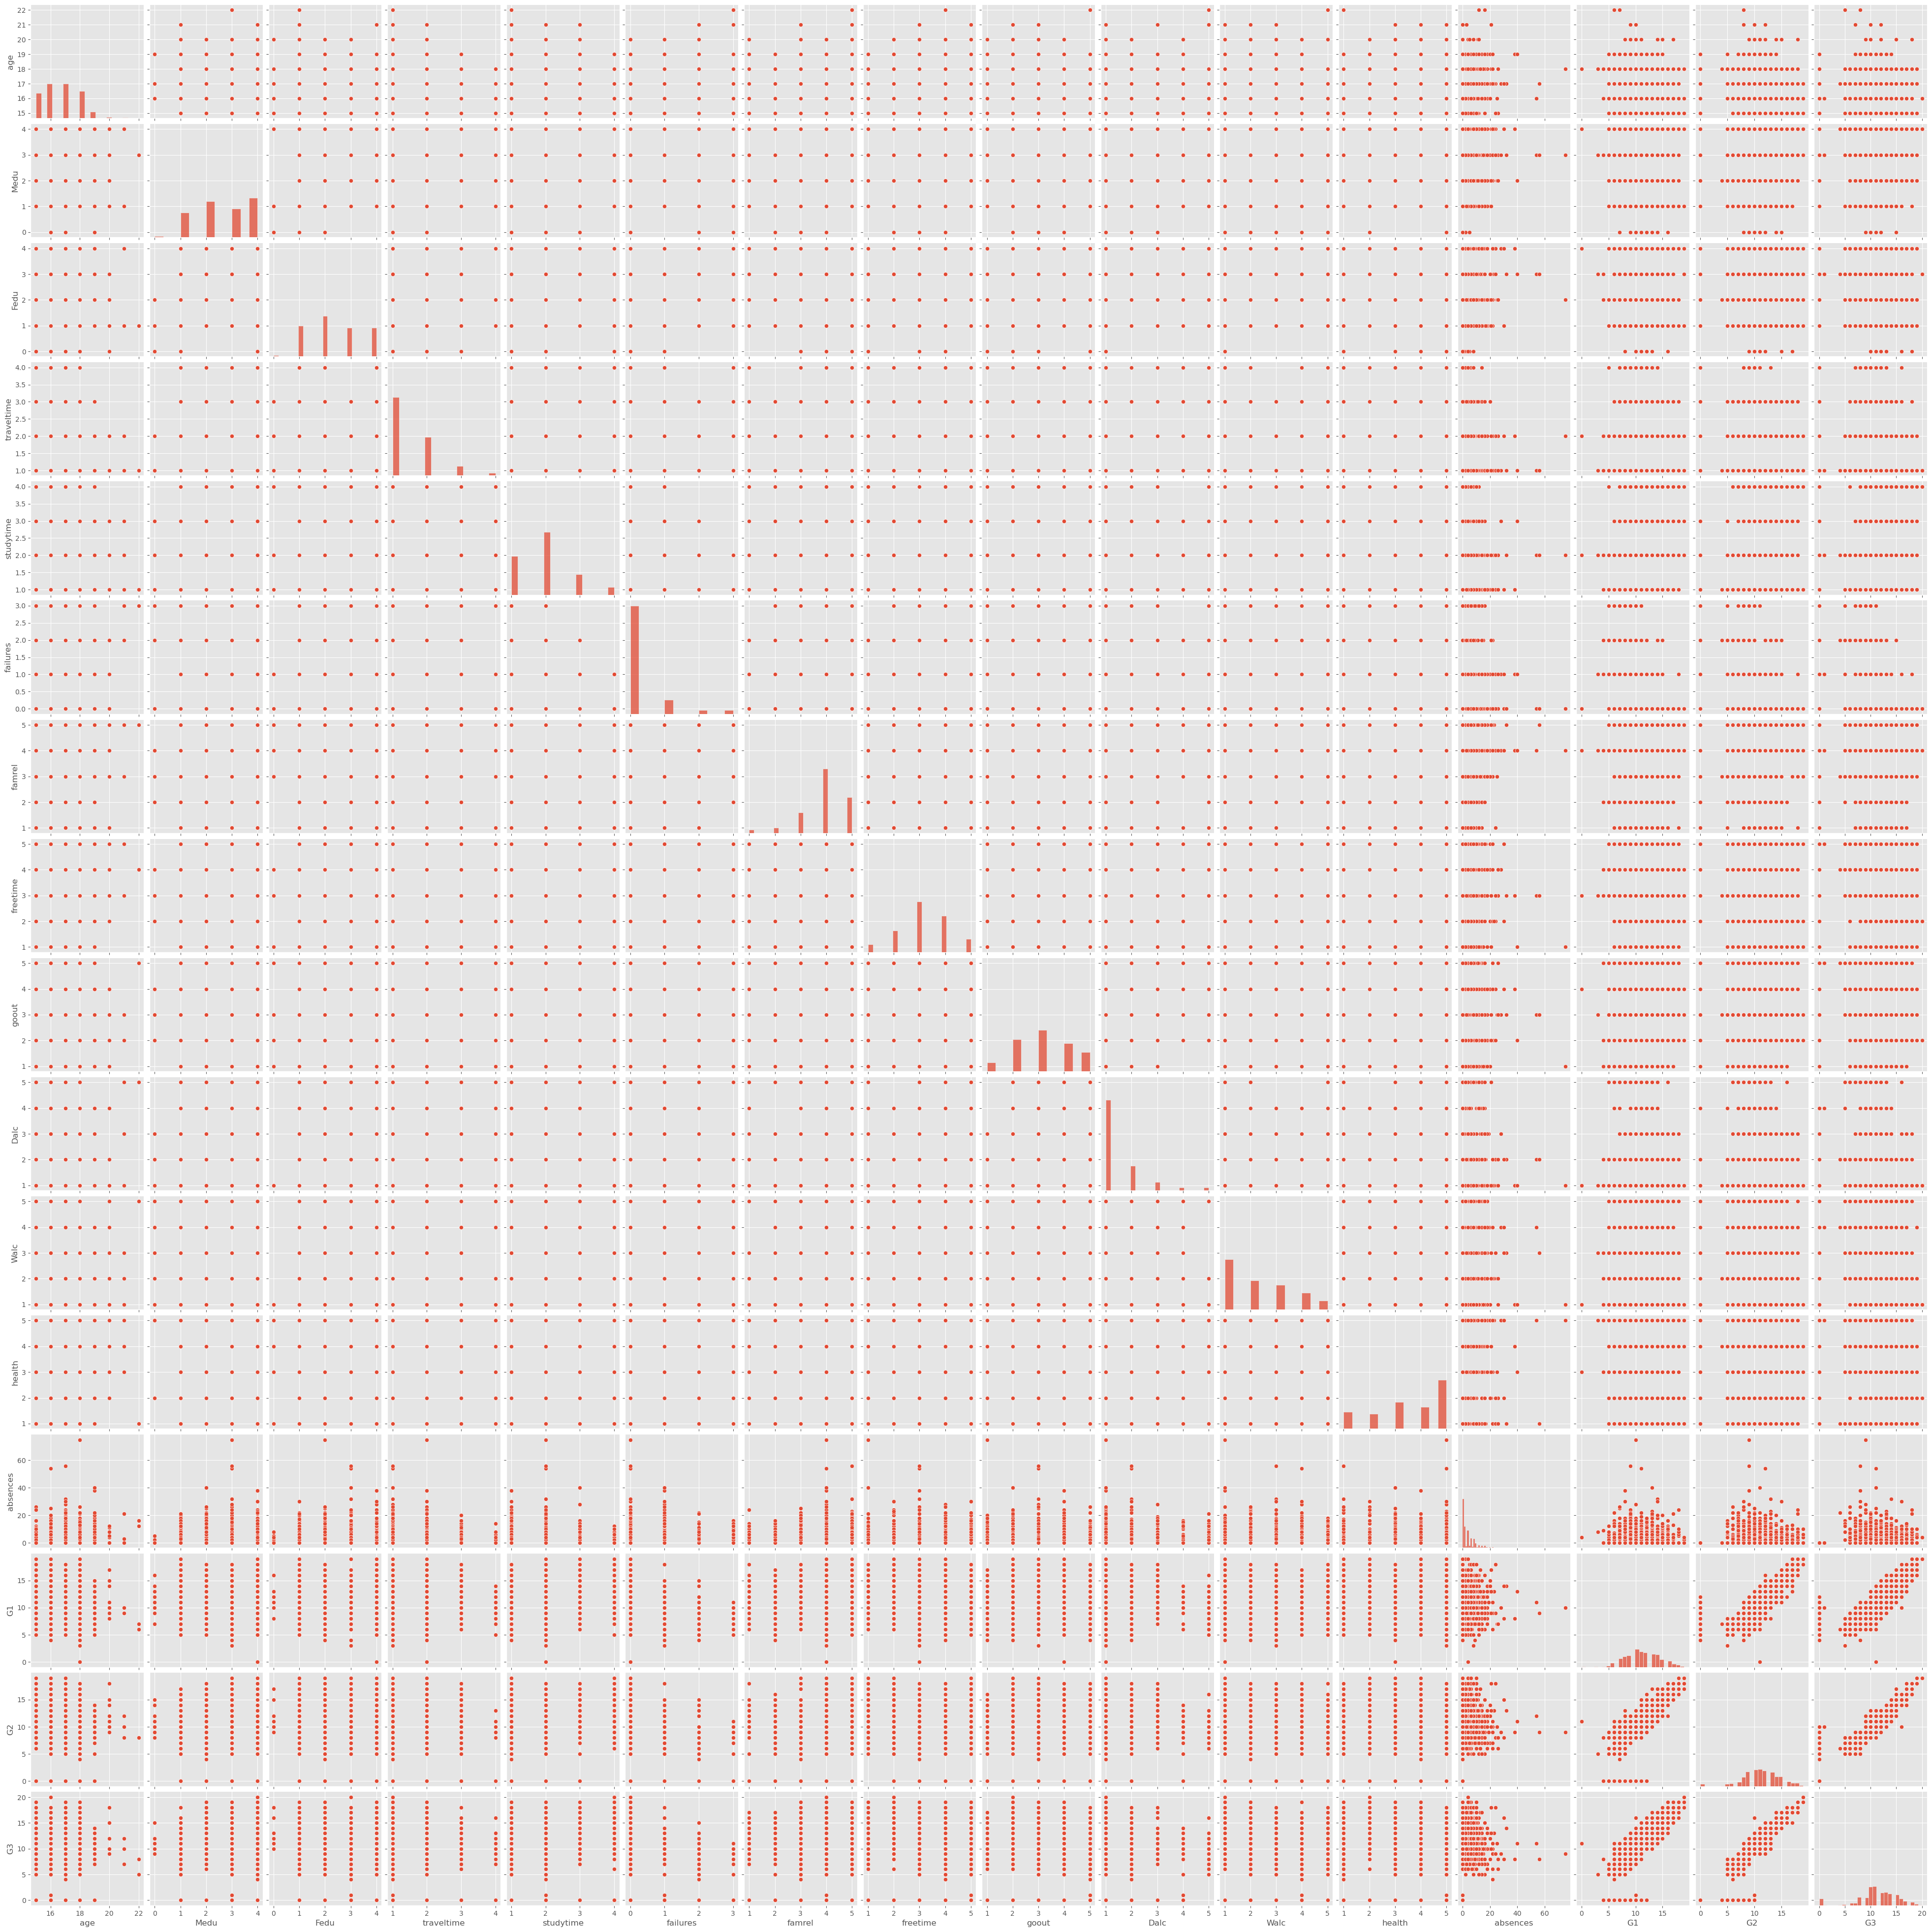

In [384]:
sns.pairplot(df_final)

### Regresion lineal multiple 
Vamos a hacer la predicción de la nota final (G3) 

In [938]:
X_orig = df.drop(columns=['G3'])  # Eliminamos la variable objetivo
X_orig.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other,curso_Portugués
0,1,0,18,1,1,0,4,4,2,2,...,0,0,0,1,0,0,0,1,0,0
1,1,0,17,1,1,1,1,1,1,2,...,0,1,0,0,0,0,0,0,0,0
2,1,0,15,1,0,1,1,1,1,2,...,0,1,0,0,0,1,0,1,0,0
3,1,0,15,1,1,1,4,2,1,3,...,0,0,1,0,1,0,0,1,0,0
4,1,0,16,1,1,1,3,3,1,2,...,0,1,0,0,1,0,0,0,0,0


In [940]:
y_orig = df['G3']
y_orig.head()
 

0     6
1     6
2    10
3    15
4    10
Name: G3, dtype: int64

In [942]:
y_orig.shape
X_orig.shape

(1129, 42)

In [944]:
X_train, X_test, y_train, y_test = train_test_split(X_orig, y_orig, random_state=123,train_size = 0.8) #80% para entrenamiento, 20% para prueba
df = pd.concat([X_train,y_train], axis=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(226,)

In [946]:
X_train = sm.add_constant(X_train, prepend=True)  #agregamos una constante 

In [948]:
modelo = sm.OLS(y_train, X_train)
modelo = modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     105.5
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          5.40e-307
Time:                        20:31:05   Log-Likelihood:                -1696.4
No. Observations:                 903   AIC:                             3479.
Df Residuals:                     860   BIC:                             3685.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0393      1.07

Este modelo tiene un $R^2$ ajustado de 0.829

Aunque la mayoria de nuestras variables no son significativas el modelo tiene un $R^2$ alto.


### Aplicaremos la selección de modelos
Veremos que variables construyen el mejor modelo predictivo

In [950]:
def nCp(sigma2 , estimator , X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [952]:
design = MS(df.columns.drop('G3')).fit(df)  #MS para adquirir nuestra matriz de caracteristicas 
Y = np.array(df['G3'])
X = design.transform(df)
sigma2 = OLS(Y,X).fit().scale

In [954]:
neg_Cp = partial(nCp , sigma2)

In [956]:
strategy = Stepwise.first_peak(design ,direction='both',max_terms=len(design.terms))

In [958]:
df_G3 = sklearn_selected(OLS ,strategy)
df_G3.fit(df , Y)
df_G3.selected_state_


('Dalc',
 'Fedu',
 'Fjob_health',
 'Fjob_other',
 'Fjob_services',
 'Fjob_teacher',
 'G1',
 'G2',
 'Medu',
 'Mjob_health',
 'Mjob_other',
 'Mjob_services',
 'Mjob_teacher',
 'Pstatus',
 'Walc',
 'absences',
 'activities',
 'address',
 'age',
 'curso_Portugués',
 'failures',
 'famrel',
 'famsize',
 'famsup',
 'freetime',
 'goout',
 'guardian_mother',
 'guardian_other',
 'health',
 'higher',
 'internet',
 'nursery',
 'paid',
 'reason_home',
 'reason_other',
 'reason_reputation',
 'romantic',
 'school',
 'schoolsup',
 'sex',
 'studytime',
 'traveltime')

In [236]:
df_Cp = sklearn_selected(OLS ,strategy ,scoring=neg_Cp)# usando socring=neg_Cp se obtine el modelo con menor variables
df_Cp.fit(df , Y)
df_Cp.selected_state_

('G1',
 'G2',
 'absences',
 'activities',
 'age',
 'curso_Portugués',
 'famsize',
 'reason_home',
 'reason_other')

### Haremos un modelo predictivo usando unicamente estas variables 

In [959]:
# Seleccionar las variables predictoras
X = df[['G1', 'G2', 'absences', 'activities', 'age', 'curso_Portugués', 'famsize','reason_home', 'reason_other']]

# Definir la variable objetivo (G3)
y = df['G3']

In [960]:
X_2train, X_2test, y_2train, y_2test = train_test_split(X, y, test_size=0.2, random_state=123)


In [961]:
X_2train = sm.add_constant(X_2train, prepend=True)  #agregamos una constante 

In [283]:
modelo2 = sm.OLS(y_2train, X_2train)
modelo2 = modelo2.fit()
print(modelo2.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     406.2
Date:                Mon, 17 Mar 2025   Prob (F-statistic):          1.42e-273
Time:                        10:48:18   Log-Likelihood:                -1343.7
No. Observations:                 722   AIC:                             2707.
Df Residuals:                     712   BIC:                             2753.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5745      0.891     

##### En este nuevo modelo quitamos gran parte de nuestras variables, como se puede observar el $R^2$ ajustado aumento a 0.835 aumentando el poder explicativo. El nuevo modelo es mejor ya que es más simple y se aumenta la precisión.

Aunque este es el modelo recomendado vamos a probar otras variables que igual en el contexto del problema pueden ser relevantes

In [962]:
#Modelo 3

X3 = df[['G1', 'G2','curso_Portugués', 'absences','age', 'famsize','failures','higher','activities']]

# Definir la variable objetivo (G3 - Nota final)
df['G3_log'] = np.log(df['G3'] + 1)
y3 = df['G3']

X_3train, X_3test, y_3train, y_3test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X_3train = sm.add_constant(X_3train, prepend=True)  #agregamos una constante 

modelo3 = sm.OLS(y_3train, X_3train)
modelo3 = modelo3.fit()
print(modelo3.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     404.9
Date:                Tue, 18 Mar 2025   Prob (F-statistic):          3.72e-273
Time:                        20:34:23   Log-Likelihood:                -1344.6
No. Observations:                 722   AIC:                             2709.
Df Residuals:                     712   BIC:                             2755.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.5339      0.951     

En este modelo cambiamos las variables reason_home', 'reason_other', por las variables 'failures', 'higher' y el nivel predictivo disminuyó insignificativamente.

### Supuestos de este modelo

In [968]:
resid_val = modelo3.resid
fitted_val= modelo3.predict()
print(f"Media de los residuales: {modelo3.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo3.resid.std()}")

Media de los residuales: -8.121542834986463e-15
Desviación estándar de los residuales: 1.5591532748171402


##### Normalidad

In [970]:
stat, p_value, _, _ = jarque_bera(resid_val)
 
print(f'Estadístico de Jarque-Bera: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')
 
if p_value > 0.05:
    print("No se rechaza H0: Los residuos parecen normales")
else:
    print("Se rechaza H0: Los residuos NO son normales")

Estadístico de Jarque-Bera: 5133.0554
P-valor: 0.0000
Se rechaza H0: Los residuos NO son normales


##### Homocedasticidad 

In [972]:
# Prueba de Breusch-Pagan
bp = het_breuschpagan(resid_val, modelo3.model.exog)
 
# Resultados: estadístico, p-valor, estadístico F y p-valor F
print(f"Estadístico LM: {bp[0]}")
print(f"P-valor: {bp[1]}")
print(f"Estadístico F: {bp[2]}")
print(f"P-valor F: {bp[3]}")
 
# Si el p-valor es < 0.05, se rechaza H0 (existe heterocedasticidad).
 

Estadístico LM: 64.13934031506172
P-valor: 2.1206384459066417e-10
Estadístico F: 7.713083923711611
P-valor F: 7.162375629106083e-11


Como el p-value es menor a 0.05 se rechaza Ho y no existe homocedasticidad 

Text(0.5, 1.0, 'Fitted vs Residuals')

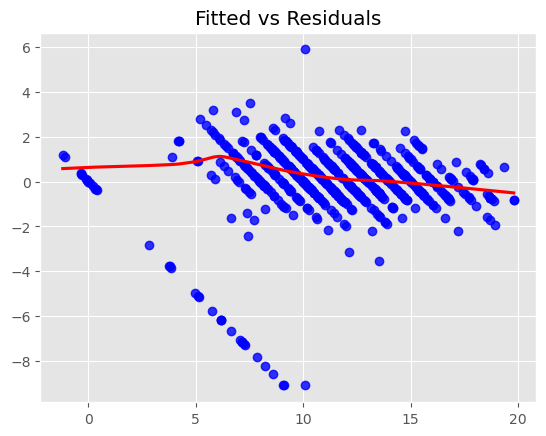

In [974]:
# Homocedasticidad: Igualdad de varianzas
sns.regplot(x=fitted_val,y = resid_val, color='blue', lowess=True, line_kws={'color':'red'})
plt.title('Fitted vs Residuals')

In [976]:
from scipy.stats import shapiro
stat, p = shapiro(resid_val)
print(f"p-valor: {p}")  # Si p < 0.05, no hay normalidad


p-valor: 3.362156230286882e-31


Se rechaza H0 y se concluye que no hay normalidad 

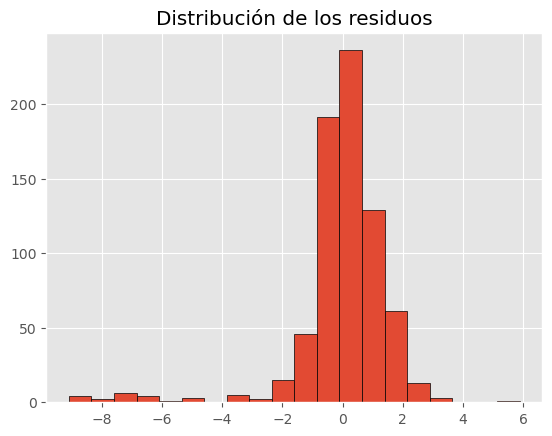

In [978]:
plt.hist(resid_val, bins=20, edgecolor='black')
plt.title("Distribución de los residuos")
plt.show()


#### En este modelo los errores no son normales y hay heterocedasticidad, asi que aplicaremos un modelo no lineal.

In [980]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Usaremos las variables que nos salieron en la seleccion de modelos
X = df[['G1', 'G2','curso_Portugués', 'absences','age', 'famsize','failures','higher','activities']]
y = df['G3']

# Polinomio de grado 2 para todas las variables
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Modelo de regresión polinomial
modelo_poly = sm.OLS(y, X_poly).fit()
print(modelo_poly.summary())


                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.985
Model:                            OLS   Adj. R-squared (uncentered):              0.984
Method:                 Least Squares   F-statistic:                              1100.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                        0.00
Time:                        20:36:48   Log-Likelihood:                         -1640.3
No. Observations:                 903   AIC:                                      3381.
Df Residuals:                     853   BIC:                                      3621.
Df Model:                          50                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Este modelo aunque tiene un mayor nivel de predicción, tiene un alto número de variables, no todas significativas, así que pondremos de manera polinomica solo a 'G1', 'G2', 'absences' y eliminaremos a las variables de 'famsize','higher', 'age' ya que no aportan mucha información al modelo.

In [1094]:
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

# Variables que mantendrán polinomios
vars_polinomiales = ['G1', 'G2','failures', 'absences']

# Aplicar polinomio solo a algunas variables
poly = PolynomialFeatures(degree=2, include_bias=False)
poly_data = poly.fit_transform(df[vars_polinomiales])

# Juntar con el resto de variables sin polinomios
otras_vars = df[['activities','curso_Portugués']]
X_final = np.hstack([poly_data, otras_vars])

# Modelo con términos polinomiales parciales
modelo_final = sm.OLS(df['G3'], X_final).fit()
print(modelo_final.summary())


                                 OLS Regression Results                                
Dep. Variable:                     G3   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3102.
Date:                Tue, 18 Mar 2025   Prob (F-statistic):                        0.00
Time:                        21:23:57   Log-Likelihood:                         -1703.3
No. Observations:                 903   AIC:                                      3439.
Df Residuals:                     887   BIC:                                      3516.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Explicación
Variables Significativas:
1. x2 (G2): Coeficiente de 0.9603, altamente significativo (p < 0.001), indicando que la calificación G2 tiene una influencia positiva muy fuerte en G3.

2. x3 (G1 × G1): Coeficiente de 0.1933, significativo (p < 0.001), indicando una relación cuadrática positiva entre G1 y G3.

3. x4 (G2 × G2): Coeficiente negativo (-1.7671), altamente significativo (p < 0.001), sugiriendo un efecto cuadrático negativo de G2.

4. x12 (absences × absences): Coeficiente negativo significativo (p < 0.001), lo que indica que un aumento en las ausencias tiene un impacto negativo cuadrático en G3.

5. x14 (activities): Coeficiente positivo y significativo (p = 0.003), sugiriendo que participar en actividades extracurriculares sigue teniendo un efecto positivo.

6. x16 (failures): Coeficiente positivo y altamente significativo (p < 0.001), indicando que el número de fracasos sigue siendo una variable clave para explicar G3.

Tras eliminar las variables age y famsize, el modelo sigue mostrando un excelente ajuste, con un R-cuadrado de 0.982. Esta ligera reducción en el valor de $ R^2$  a 0.982 sugiere que la eliminación de estas variables no afectó significativamente la capacidad predictiva del modelo.



Media de los residuales: -0.015986175020163383
Desviación estándar de los residuales: 1.5965538216849655


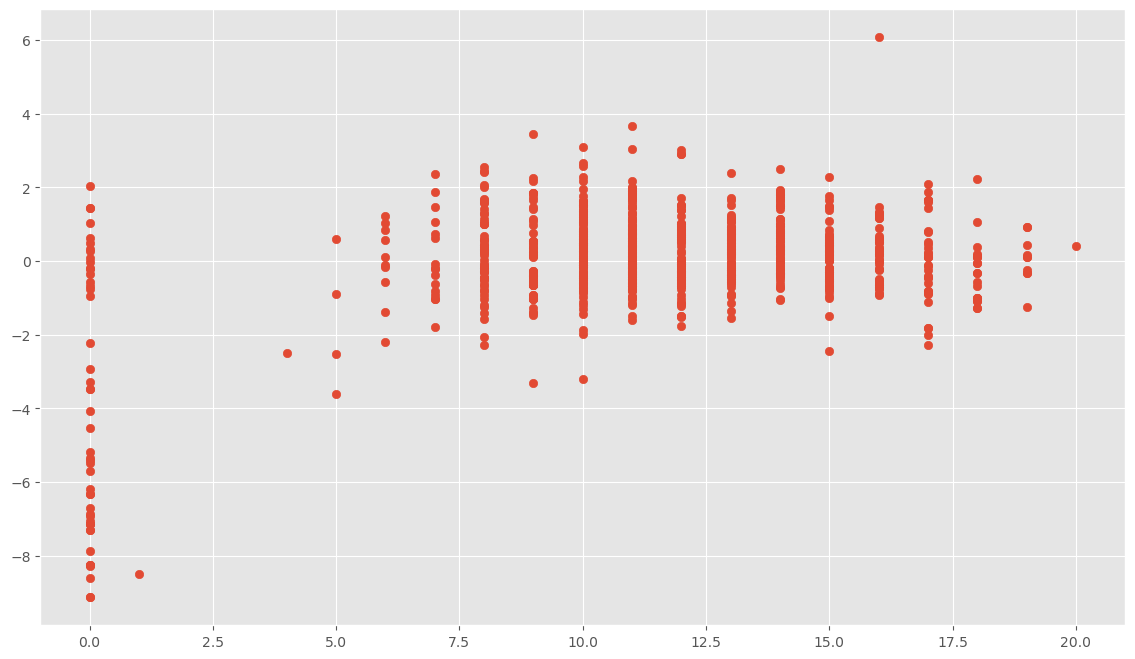

In [1098]:
resid_val2 = modelo_final.resid
plt.figure(figsize = (14,8))
plt.scatter(df['G3'],resid_val2)
fitted_val= modelo_final.predict()
print(f"Media de los residuales: {modelo_final.resid.mean()}")
print(f"Desviación estándar de los residuales: {modelo_final.resid.std()}")

In [1100]:
stat, p_value, _, _ = jarque_bera(resid_val2)
 
print(f'Estadístico de Jarque-Bera: {stat:.4f}')
print(f'P-valor: {p_value:.4f}')
 
if p_value > 0.05:
    print("No se rechaza H0: Los residuos parecen normales")
else:
    print("Se rechaza H0: Los residuos NO son normales")

Estadístico de Jarque-Bera: 5804.5792
P-valor: 0.0000
Se rechaza H0: Los residuos NO son normales


In [1102]:
# Calcular el estadístico de Durbin-Watson
dw_stat = durbin_watson(modelo_poly2.resid)
print(f'Estadistico de Durbin-Watson: {dw_stat}')

# 2: No hay autocorrelación.
# < 2: Posible autocorrelación positiva.
# > 2: Posible autocorrelación negativa

Estadistico de Durbin-Watson: 2.043198009483775


Con el estadistico de Durbin-Watson cercano a 2, podríamos decir que no hay autocorrelación 

### Conclusión de este modelo. 
El modelo de regresión no lineal múltiple desarrollado para predecir G3 muestra un alto poder explicativo con un R² de 0.983, lo que indica que el modelo explica el 98.3% de la variabilidad de las calificaciones finales de los estudiantes. Tras eliminar las variables 'famsize' ,'reason_home', 'reason_other'  por su poca relevancia, los valores de AIC y BIC disminuyeron, lo que sugiere un modelo más parsimonioso y eficiente.

La prueba de Durbin-Watson mostró que no hay autocorrelación entre los residuos, asegurando que los errores son independientes.
Aunque la prueba de normalidad indicó que los residuos no son normales, esto no afecta significativamente las predicciones debido al tamaño de la muestra (n = 903).

Dado que no se encontraron problemas graves de autocorrelación o sobreajuste, y considerando la alta capacidad predictiva del modelo, este modelo es adecuado para predecir G3 y puede ser utilizado para estimar el rendimiento académico.

## Regresion Logistica

Para la regresión logística requerimos que G3 sea binaria, asi que la convertiremos en binaria de la siguiente manera: 

1 = Aprobado (G3 > 10)

0 = No aprobado (G3 ≤ 10)

(Ya que el rango de notas van de 0 a 20)

In [1127]:
# Definir variables predictoras
X3 = df[['G1', 'G2','curso_Portugués','famsize','failures','activities']]

# Definir variable objetivo binaria
df['G3_bin'] = (df['G3'] > 10).astype(int)
y3 = df['G3_bin']

# Dividir en entrenamiento y prueba
X_3train, X_3test, y_3train, y_3test = train_test_split(X3, y3, test_size=0.2, random_state=123, shuffle=True)

# Agregar constante
X_3train = sm.add_constant(X_3train, prepend=True)

# Ajustar modelo Logit
modelo3 = sm.Logit(y_3train, X_3train)
modelo3 = modelo3.fit()

# Resumen del modelo
print(modelo3.summary())


Optimization terminated successfully.
         Current function value: 0.197526
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 G3_bin   No. Observations:                  722
Model:                          Logit   Df Residuals:                      715
Method:                           MLE   Df Model:                            6
Date:                Tue, 18 Mar 2025   Pseudo R-squ.:                  0.6981
Time:                        21:34:18   Log-Likelihood:                -142.61
converged:                       True   LL-Null:                       -472.39
Covariance Type:            nonrobust   LLR p-value:                3.311e-139
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -19.7537      1.847    -10.697      0.000     -23.373     -16.134
G1            

#### Variables Significativas
1. G1 (coef = 0.3472, p = 0.004): Por cada unidad adicional en la nota de G1 (primer periodo), la probabilidad de aprobar aumenta significativamente.
Esto indica que un mejor desempeño inicial está fuertemente asociado con la probabilidad de éxito final.

2. G2 (coef = 1.5824, p < 0.001): G2 (nota del segundo periodo) tiene un impacto muy fuerte en la probabilidad de aprobar.
Por cada unidad adicional en G2, la probabilidad de aprobar aumenta considerablemente, lo que sugiere que esta variable es el mejor predictor del resultado final.

3. curso_Portugués (coef = 0.6926, p = 0.035): Los estudiantes que cursan Portugués tienen una mayor probabilidad de aprobar que los de Matemáticas.
El efecto es positivo y significativo, lo que sugiere que el tipo de curso influye ligeramente en el desempeño final.

4. failures (coef = -0.7635, p = 0.028): Cada fracaso adicional (failures) disminuye significativamente la probabilidad de aprobar.
Los estudiantes que han tenido más fracasos previos tienen menor probabilidad de éxito.

El modelo tiene un Pseudo R-squared de 0.6986, lo que indica un buen ajuste. Las notas de los primeros periodos (G1 y G2) y el historial de fracasos son las variables más importantes para predecir el éxito académico. Algunas variables como las ausencias, la edad y la participación en actividades no tienen un impacto significativo.

###  Matriz de confusión

In [1129]:
predicciones = modelo3.predict(exog=X_3train)

# Clasificación binaria según el umbral 0.5
clasificacion = np.where(predicciones < 0.5, 0, 1)

# Crear matriz de confusión
cm = pd.crosstab(
    y_3train,
    clasificacion,
    rownames=['Real'],
    colnames=['Predicción']
)
cm

Predicción,0,1
Real,,
0,233,28
1,28,433


### Qué nos dice la matríz de confusión?
Resumen:
Verdaderos Negativos (TN): 223 → Casos correctamente clasificados como clase 0 (reprobados).

Falsos Positivos (FP): 28 → Casos incorrectamente clasificados como clase 1 (aprobados).

Falsos Negativos (FN): 28 → Casos incorrectamente clasificados como clase 0.

Verdaderos Positivos (TP): 433 → Casos correctamente clasificados como clase 1.


<Axes: xlabel='Predicción', ylabel='Real'>

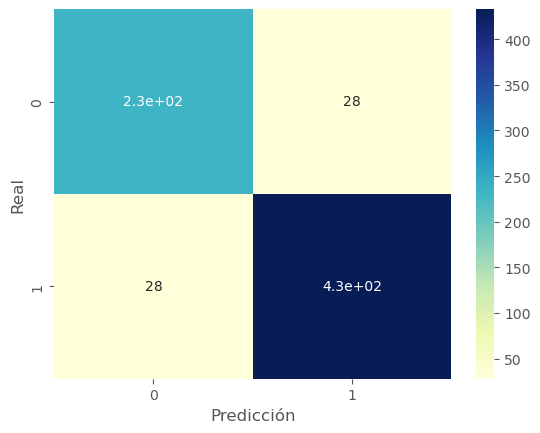

In [1131]:
sns.heatmap(cm, cmap = "YlGnBu", annot = True)

In [1133]:
X_3test = sm.add_constant(X_3test, prepend=True) # Agrega la constante a X_test
pred_test = modelo3.predict(exog = X_3test) # Realiza las predicciones en el conjunto de prueba
pred_test = np.where(pred_test<0.5, 0, 1)

In [1135]:
accuracy = accuracy_score(
            y_true    = y_3test,
            y_pred    = pred_test,
            normalize = True
           )
print("")
print(f"El accuracy de test es: {100*accuracy}%")


El accuracy de test es: 92.26519337016575%


In [1137]:
df['G3_bin'].value_counts()

G3_bin
1    575
0    328
Name: count, dtype: int64

#### El modelo clasifica correctamente el 92.26% de los casos, lo que indica un buen desempeño general.

In [1139]:
## Metreicas de evaluación
accuracy = accuracy_score(y_3test, pred_test)
precision = precision_score(y_3test, pred_test)
recall = recall_score(y_3test, pred_test)
f1 = f1_score(y_3test, pred_test)
auc_roc = roc_auc_score(y_3test, pred_test)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Exactitud (Accuracy): 0.9226519337016574
Precisión (Precision): 0.9166666666666666
Recall (Sensitivity): 0.9649122807017544
F1-score: 0.9401709401709402
AUC-ROC: 0.9078292746792354


### Conclusión del Modelo de Regresión Logística
El modelo de regresión logística desarrollado para predecir G3 ha mostrado buenos resultados.

Exactitud (Accuracy): Una alta exactitud (92.26%), Esto indica un buen rendimiento general al diferenciar entre estudiantes aprobados y reprobados.

Precisión (Precision): Tiene un 91.67% indica que el modelo tiene un bajo índice de falsos positivos, es decir, cuando predice que un estudiante aprueba, es correcto la mayoría de las veces.

Sensibilidad (Recall): La alta sensibilidad (96.49%) indica el modelo detecta casi todos los casos de éxito, lo que sugiere que es muy efectivo para no pasar por alto estudiantes aprobados.

Puntuación F1: Un F1-score del 94.02% indica un buen balance entre ambos indicadores, lo que confirma que el modelo es consistente tanto en detectar casos positivos como en evitar falsos positivos.

AUC-ROC: Un AUC-ROC del 90.78% indica que el modelo tiene un alto poder discriminativo para diferenciar entre estudiantes aprobados y reprobados, lo que demuestra un excelente desempeño.

El modelo logístico ha demostrado ser un modelo predictivo confiable y preciso para predecir la aprobación o reprobación de los estudiantes. El desempeño es particularmente sólido en términos de sensibilidad, lo que garantiza que la mayoría de los casos positivos se detectan correctamente. Además, la precisión y el AUC-ROC reflejan un bajo nivel de errores en la clasificación

#### Modelo Linear Discriminant Analysis (LDA)

In [1163]:
# Definir variables 
X_lda = df[['G1', 'G2','curso_Portugués','famsize','failures','activities']]

# Definir variable objetivo binaria
df['G3_bin'] = (df['G3'] > 10).astype(int)
y_lda = df['G3_bin']

# Dividir los datos en conjunto de entrenamiento y prueba
X_4train, X_4test, y_4train, y_4test = train_test_split(
    X_lda, 
    y_lda, 
    train_size=0.8, 
    random_state=123, 
    shuffle=True
)

# Crear y entrenar el modelo LDA
lda = LDA()
lda.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
pred = lda.predict(X_test)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, pred)

# Imprimir las predicciones
print("Predicciones:\n", pred)


Predicciones:
 [0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1
 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1
 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1
 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1]


In [1165]:
cm = confusion_matrix(y_test,pred)
print("Matriz de confusión:\n", cm)

Matriz de confusión:
 [[ 55  12]
 [  6 108]]


### Qué nos dice la matríz de confusión?
Resumen:
Verdaderos Negativos (TN): 55 → Casos correctamente clasificados como clase 0 (reprobados).

Falsos Positivos (FP): 12 → Casos incorrectamente clasificados como clase 1 (aprobados).

Falsos Negativos (FN): 6 → Casos incorrectamente clasificados como clase 0.

Verdaderos Positivos (TP): 108 → Casos correctamente clasificados como clase 1.


<Axes: >

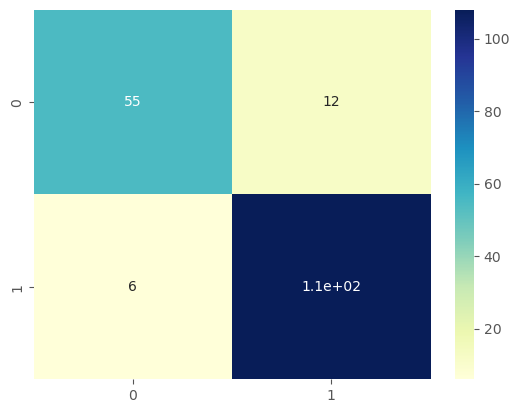

In [1145]:
sns.heatmap(cm,cmap="YlGnBu",annot=True)

In [1147]:
## Metricas de evaluación
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc_roc = roc_auc_score(y_test, pred)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Exactitud (Accuracy): 0.9005524861878453
Precisión (Precision): 0.9
Recall (Sensitivity): 0.9473684210526315
F1-score: 0.9230769230769231
AUC-ROC: 0.8841319717203456


### Conclusión del Modelo LDA
Exactitud (Accuracy): Una alta exactitud (90.01%), Esto indica un buen rendimiento general al diferenciar entre estudiantes aprobados y reprobados.

Precisión (Precision): Tiene u90%1% indica que el modelo tiene un bajo índice de falsos positivos, es decir, cuando predice que un estudiante aprueba, es correcto la mayoría de las veces.

Sensibilidad (Recall): La alta sensibilida4.736.49%) indica el modelo detecta casi todos los casos de éxito, lo que sugiere que es muy efectivo para no pasar por alto estudiantes aprobados.

Puntuación F1: Un F1-score2.30 93.62% indica un buen balance entre ambos indicadores, lo que confirma que el modelo es consistente tanto en detectar casos positivos como en evitar falsos positivos.

AUC-ROC: Un AUC-88.41l 90.03% indica que el modelo tiene un alto poder discriminativo para diferenciar entre estudiantes aprobados y reprobados, lo que demuestra un excelente desempeño.

El modelo LDA ofrece un excelente rendimiento general, con una alta sensibilidad que garantiza que casi todos los casos positivos son detectados, mientras que la precisión mantiene un bajo índice de falsos positivos. Aunque el modelo es ligeramente menos preciso que el modelo logístico, su AUC-ROC cercano al 90% indica que sigue siendo una herramienta sólida para la predicción de resultados académicos. 

### Modelo Quadratic Discriminant Analysis (QDA) 

In [1167]:
qda = QDA()
qda.fit(X_4train,y_4train)

pred = qda.predict(X_test)
cm = confusion_matrix(y_test,pred)
print(cm)

[[ 42  25]
 [  5 109]]


### Qué nos dice la matríz de confusión?
Resumen:
Verdaderos Negativos (TN): 42 → Casos correctamente clasificados como clase 0 (reprobados).

Falsos Positivos (FP): 25 → Casos incorrectamente clasificados como clase 1 (aprobados).

Falsos Negativos (FN): 5 → Casos incorrectamente clasificados como clase 0.

Verdaderos Positivos (TP): 109 → Casos correctamente clasificados como clase 1.


<Axes: >

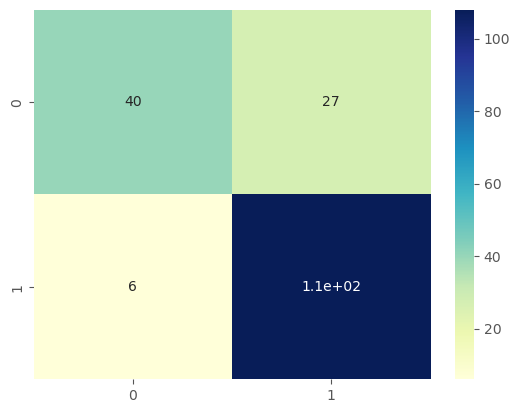

In [1070]:
sns.heatmap(cm,cmap="YlGnBu",annot=True)

In [1151]:
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred)
recall = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)
auc_roc = roc_auc_score(y_test, pred)

# Imprimir métricas
print("Exactitud (Accuracy):", accuracy)
print("Precisión (Precision):", precision)
print("Recall (Sensitivity):", recall)
print("F1-score:", f1)
print("AUC-ROC:", auc_roc)

Exactitud (Accuracy): 0.8342541436464088
Precisión (Precision): 0.8134328358208955
Recall (Sensitivity): 0.956140350877193
F1-score: 0.8790322580645161
AUC-ROC: 0.7915030112594921


### Conclusión del Modelo QDA
El modelo QDA ha mostrado resultados aceptables, reflejados en las siguientes métricas:

Exactitud (Accuracy) 83.42% aunque la exactitud es menor que en los modelos previos, aún presenta un desempeño razonable para la clasificación de estudiantes aprobados y reprobados.

Precisión (Precision) La precisión indica que el 81.34% de las predicciones positivas (aprobados) son correctas. Sin embargo, esta métrica es más baja que en los modelos anteriores, lo que sugiere un mayor índice de falsos positivos (prediciendo aprobados incorrectamente).

Sensibilidad (Recall) alta (94.74%) Un 95.61% indica que el modelo identifica la mayoría de los estudiantes aprobados, lo que sugiere una alta capacidad para detectar casos positivos

Puntuación F1, la puntuación F1, que equilibra precisión y sensibilidad, es 87.90%. Aunque es menor que en los modelos anteriores, aún indica un rendimiento aceptable en la clasificación general.

AUC-ROC Un 79.15% sugiere que el modelo tiene un poder discriminativo moderado, pero es menos efectivo que el modelo logístico y LDA en distinguir correctamente entre estudiantes aprobados y reprobados.


El modelo QDA ofrece un buen desempeño, especialmente en términos de sensibilidad, ya que detecta la mayoría de los casos positivos. Sin embargo, su precisión y capacidad discriminativa son menores en comparación con los modelos anteriores, lo que sugiere que puede ser menos confiable para evitar falsos positivos

## Conclusión Final

Evaluando los diferentes modelos predictivos:

Modelo de regresión no lineal múltiple:
Este modelo es una excelente opción para predecir la nota final (G3) de los estudiantes, dado que presenta un R² elevado, lo que indica un buen ajuste a los datos. Si bien una desventaja es la cantidad de variables involucradas, es importante destacar que, partiendo de un conjunto inicial de 37 variables, se logró reducir el modelo a 6 variables clave (combinadas de forma polinomial y lineal), lo que resultó en un total de 16 términos en el modelo final.

Modelos de clasificación:
Al comparar los modelos de Regresión Logística, LDA y QDA para predecir si los estudiantes aprobarán o no el curso, el modelo de Regresión Logística se destaca como la mejor alternativa. Este modelo ofrece las métricas más altas entre los tres, incluyendo precisión, sensibilidad, y F1-score, además de utilizar un conjunto reducido de variables, lo que lo hace más interpretable y eficiente.

Conclusión Final: Tanto el modelo de regresión no lineal múltiple para predecir la nota final como el modelo de Regresión Logística para clasificar la aprobación de los estudiantes son las opciones más adecuadas para este conjunto de datos